In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [4]:
for x,y in training_set:
     print(x)
     print(y)
     break

tf.Tensor(
[[[[169.   161.   172.  ]
   [167.75 159.75 170.75]
   [166.   158.   169.  ]
   ...
   [101.   114.25  88.25]
   [111.75 127.    98.  ]
   [108.75 124.    95.  ]]

  [[169.   161.   172.  ]
   [169.5  161.5  172.5 ]
   [170.   162.   173.  ]
   ...
   [103.   119.5   90.25]
   [101.5  120.25  89.75]
   [ 94.   113.    80.75]]

  [[169.5  161.5  172.5 ]
   [170.5  162.5  173.5 ]
   [171.75 163.75 174.75]
   ...
   [ 98.75 120.75  87.5 ]
   [106.   129.75  94.25]
   [ 93.5  117.5   81.25]]

  ...

  [[123.   112.25 115.5 ]
   [118.25 108.25 107.75]
   [119.25 109.25 108.25]
   ...
   [ 55.25  62.75  31.75]
   [ 45.75  52.75  21.75]
   [ 40.75  45.75  15.75]]

  [[117.5  105.5  107.5 ]
   [119.   107.   107.  ]
   [120.75 108.75 109.25]
   ...
   [ 43.    50.    19.  ]
   [ 36.5   41.5   11.5 ]
   [ 41.    44.    15.  ]]

  [[114.75 102.75 104.75]
   [115.75 103.75 103.75]
   [116.   104.   105.  ]
   ...
   [ 36.25  41.25  11.25]
   [ 28.5   31.5    2.75]
   [ 34.    37.     

In [5]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential

In [6]:
model=Sequential()


In [7]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu', input_shape=[128, 128, 3]))
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

C:\Program Files\python\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [8]:
model.add(Conv2D(filters=64, kernel_size=3,padding='same',activation='relu', input_shape=[128, 128, 3]))
model.add(Conv2D(filters=64, kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [9]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu', input_shape=[128, 128, 3]))
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu', input_shape=[128, 128, 3]))
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Flatten())

In [12]:
model.add(Dense(units=1024,activation='relu'))

In [13]:
model.add(Dense(units=38,activation='softmax'))

In [14]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │      16,778,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          38,950 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,989,446 (68.62 MB)

 Trainable params: 17,989,446 (68.62 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3015s 1s/step - accuracy: 0.4435 - loss: 2.1519 - val_accuracy: 0.8417 - val_loss: 0.4804
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4079s 2s/step - accuracy: 0.8695 - loss: 0.4062 - val_accuracy: 0.8933 - val_loss: 0.3208
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3295s 1s/step - accuracy: 0.9147 - loss: 0.2568 - val_accuracy: 0.9134 - val_loss: 0.2630
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2552s 1s/step - accuracy: 0.9330 - loss: 0.1990 - val_accuracy: 0.9162 - val_loss: 0.2702
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2419s 1s/step - accuracy: 0.9469 - loss: 0.1622 - val_accuracy: 0.9015 - val_loss: 0.3615
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2395s 1s/step - accuracy: 0.9494 - loss: 0.1480 - val_accuracy: 0.9059 - val_loss: 0.3446
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2376s 1s/step - accuracy: 0.9569 - loss: 0.1335 - val_accuracy: 0.9261 - val_loss: 0.2757
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 25853s 12s/step - accuracy: 0.9569

MODEL EVALUATION

model evaluation on training set

In [17]:
train_losss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1121s 510ms/step - accuracy: 0.9424 - loss: 0.1789


In [19]:
print(train_losss,train_acc)

0.16694298386573792 0.9461128115653992


In [20]:
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 301s 546ms/step - accuracy: 0.8938 - loss: 0.4156


In [22]:
print(val_loss,val_acc)

0.4046456217765808 0.8936375975608826


SAVING MODEL

In [23]:
model.save("trained_model.h5")

In [24]:
model.save("trained_model.keras")

In [25]:
training_history.history

{'accuracy': [0.649690568447113,
  0.8867060542106628,
  0.9223984479904175,
  0.9351873993873596,
  0.9482893347740173,
  0.9507361650466919,
  0.9548474550247192,
  0.9603385925292969,
  0.9609218239784241,
  0.9642221927642822],
 'loss': [1.196027398109436,
  0.3494885265827179,
  0.2356143444776535,
  0.1938592493534088,
  0.1573890894651413,
  0.14810453355312347,
  0.14015954732894897,
  0.12303637713193893,
  0.12221838533878326,
  0.11256608366966248],
 'val_accuracy': [0.8417368531227112,
  0.8932961821556091,
  0.9133849143981934,
  0.9161734580993652,
  0.901547908782959,
  0.9058730006217957,
  0.9261325001716614,
  0.90888911485672,
  0.9162873029708862,
  0.8936375975608826],
 'val_loss': [0.4804255962371826,
  0.3207557201385498,
  0.26296576857566833,
  0.2701924741268158,
  0.3615342378616333,
  0.3445567786693573,
  0.2756596505641937,
  0.34664854407310486,
  0.3234396278858185,
  0.4046318233013153]}

In [37]:
training_history.history['val_accuracy']

[0.8417368531227112,
 0.8932961821556091,
 0.9133849143981934,
 0.9161734580993652,
 0.901547908782959,
 0.9058730006217957,
 0.9261325001716614,
 0.90888911485672,
 0.9162873029708862,
 0.8936375975608826]

In [26]:
#Recording history in json

In [29]:
import json
with open("training_hist.json","w")as f:
    json.dump(training_history.history,f)

In [30]:
#Accuracy Visualization

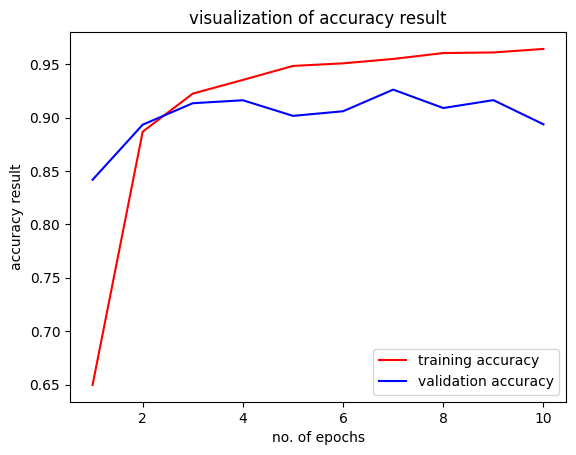

In [40]:
# Correctly defining epochs as a list
epochs = [i for i in range(1, 11)]

# Assuming training_history.history['accuracy'] exists and is a list with 10 elements
plt.plot(epochs, training_history.history['accuracy'], color='red', label='training accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='validation accuracy')
plt.xlabel("no. of epochs")
plt.ylabel("accuracy result")
plt.title("visualization of accuracy result")
plt.legend()
plt.show()


##some other metrices for model evaluation

In [43]:
class_name =validation_set.class_names
class_name


['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [44]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [46]:
y_pred=model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 325s 591ms/step


(array([[9.9997914e-01, 1.9144269e-05, 6.7951068e-11, ..., 2.6967812e-17,
         3.0007236e-13, 7.5876458e-12],
        [9.9896860e-01, 4.5860262e-04, 7.7290352e-09, ..., 5.5671365e-19,
         1.3175665e-09, 1.0109616e-12],
        [9.9999630e-01, 2.3637592e-10, 1.7635560e-10, ..., 2.7253724e-16,
         1.7908434e-13, 8.6421894e-12],
        ...,
        [8.6324841e-14, 2.5765492e-17, 2.2850520e-06, ..., 1.0382633e-10,
         2.2463901e-16, 9.9890459e-01],
        [2.6041642e-08, 4.7243088e-16, 4.3914272e-09, ..., 1.4505836e-08,
         3.2388845e-11, 9.9997973e-01],
        [7.5145712e-10, 4.0409599e-11, 2.2470299e-07, ..., 8.8729172e-12,
         1.8567270e-07, 9.9846727e-01]], dtype=float32),
 (17572, 38))

In [47]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [48]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [49]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [17]:
import tensorflow as tf

In [15]:
Y_true = tf.argmax(y_pred,axis=1)
Y_true


NameError: name 'y_pred' is not defined

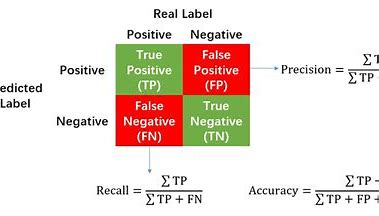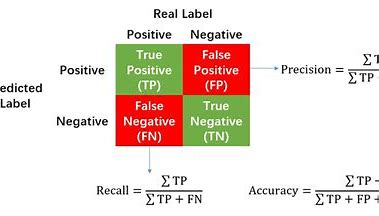

In [2]:
from sklearn.metrics import classification_report

In [3]:
classification_report

<function sklearn.metrics._classification.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>

In [10]:
print(classification_report(y_true, predicted_categories, target_names=class_names))

NameError: name 'y_true' is not defined

In [17]:
from sklearn.metrics import classification_report,confusion_matrix

In [13]:
print(classification_report(y_true, predicted_categories, target_names=class_names))

NameError: name 'y_true' is not defined

In [14]:
import tensorflow as tf

In [18]:
cm=confusion-matrix(y_true,predicted_categories)
cm.shape

NameError: name 'confusion' is not defined